17.06.24
Veronika Wendler
#### Preparing the DataFrame (sub001 to sub050) to later run a MCMC HDM model on painreward task using HDDM package by Wiecki (2015); using the full data set (sub-001-sub-050)

1. Iterating through the tsv files and storing selected data from all subjects in a csv file : subs_concatenated_001_050.csv
2. Creating 'moneylevel': Recode 'moneystim' to integer values , we already have 'painlevel' as integer
3. Preprocessing the data: Dropping NANs from columns:'moneylevel', 'painlevel', 'accepted'
4. Preprocessing the data: changing 'object' to 'float64' datatype to fit the model
5. Heatmap: Moneylevel and Painlevel on RT
6. Heatmap: Moneylevel and Painlevel on Acceptance
7. Setting rejection threshold to .99: Dropping participants who only ever choose money on 99% of the trials; save in file: subs_concatenated_001_050_3.csv




In [16]:
# loading the libraries
import hddm
import pandas as pd
import os
import csv
import numpy as np
import pandas as pd
import csv
import ast
import re
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import mixedlm

#from pymer4.models import Lmer               #this crashes my kernel (gonna try again later)


## 1. Behavioural data preprocessing (tsv-file iteration and selection of specific columns)

In [4]:
# 1. List the columns of interest for the new dataframe
# 2. List the participant IDs
# 3. Initialize a list to hold the data
# 4. We loop through the participant files and open and read their tsv files that hold the IDs of interest and define the file path
# 5. For each row in the tsv file we select cols of interest and parse the data
 #  6. Initialize a dictionary for the filtered row : filtered_row
 #  7. Iterate over each column in the columns of interest
 #  8. Check if the column exists in the current row
 #  9. Add the value in the row and that column to the new dictionary filtered_row
 #  10. append everything to all_data list
# 11. If the file was not found we ask the user for input, continue the process or terminate 
# 12. We convert the list of dictionaries to a DataFrame
# 13. We Save the combined data to a CSV file

cols_new_frame = [
    'participant', 'painstim', 'moneystim', 'all_trials_rewards', 'painlevel', 'painlevel_J',
    'leftstim', 'rightstim', 'acceptside', 'acceptkey', 'accepted', 'choice_resp.keys',
    'choice_resp.rt', 'blocks.thisRepN', 'trials.thisN', 'TaskName', 'P1', 'P2', 'P3', 'P4', 
    'P5', 'fail_ma', 'fixduration'
]

participant_ids = ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 
                   'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020',
                   'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-029', 'sub-030',
                   'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040',
                   'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050']

all_data = []

for participant in participant_ids:
    file_path = f"D:/Aberdeen_Uni_June24/MPColl_Lab/Week1/EEG_Data/PainReward_sub-001-050/painrewardeeg_data/{participant}\eeg\{participant}_task-decision_beh.tsv"
    try:
        with open(file_path, 'r') as tsvfile:
            reader = csv.DictReader(tsvfile, delimiter='\t')

            for row in reader:                                        # other option: filtered_row = {col: row[col] for col in cols_new_frame if col in row}
                filtered_row = {}
                for col in cols_new_frame:
                    if col in row:
                        filtered_row[col] = row[col]
                    
                all_data.append(filtered_row)

    except FileNotFoundError:
            user_input = input(f"No file for {participant}. Proceed with the next subject data? (Y/N): ").strip().upper()
            if user_input == 'Y':
                continue
            else:
                print("Process terminated by user.")
                break

combined_data = pd.DataFrame(all_data, columns=cols_new_frame)
combined_data.to_csv('subs_concatenated_001_050.csv', index=False)
combined_data



,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,acceptkey,...,blocks.thisRepN,trials.thisN,TaskName,P1,P2,P3,P4,P5,fail_ma,fixduration
0,sub-001,p1,m4,,1.0,11500.0,stimuli/m4.png,stimuli/p1.png,right,m,...,0.0,0.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.5
1,sub-001,p5,m5,,5.0,27000.0,stimuli/p5.png,stimuli/m5.png,right,m,...,0.0,1.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.6
2,sub-001,p2,m2,,2.0,14000.0,stimuli/m2.png,stimuli/p2.png,right,m,...,0.0,2.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,2.0
3,sub-001,p4,m4,,4.0,20000.0,stimuli/p4.png,stimuli/m4.png,right,m,...,0.0,3.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9
4,sub-001,p2,m3,,2.0,14000.0,stimuli/m3.png,stimuli/p2.png,right,m,...,0.0,4.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,sub-050,p3,m3,,3.0,11000.0,stimuli/m3.png,stimuli/p3.png,right,m,...,4.0,21.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.5
6171,sub-050,p3,m1,,3.0,11000.0,stimuli/m1.png,stimuli/p3.png,right,m,...,4.0,22.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7
6172,sub-050,p4,m1,,4.0,14500.0,stimuli/p4.png,stimuli/m1.png,right,m,...,4.0,23.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.9
6173,sub-050,p2,m2,,2.0,8500.0,stimuli/p2.png,stimuli/m2.png,right,m,...,4.0,24.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7


![Screenshot 2024-06-10 085429.png](<attachment:Screenshot 2024-06-10 085429.png>)
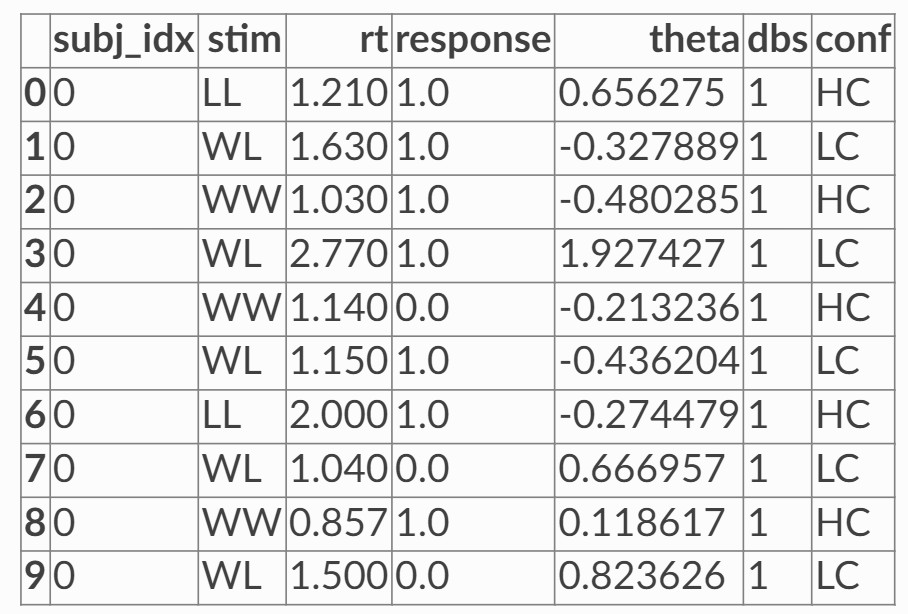

![Screenshot 2024-06-10 204438.png](<attachment:Screenshot 2024-06-10 204438.png>)
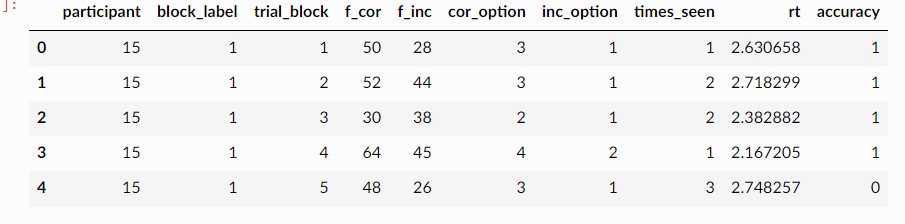

## Notes from important papers below for getting the Subjective value of pain/money (what is the trade-off) to use in DDM
TO DO's:
- in the algo, integrate a process that filters out participants who's "accuracy" is too high ...we need a certain treshold
- we need to calculate each participants’ subjective value for each offer by fitting a model that would weight pain and money. 

MP:
we first need to fit a simple model assessing how participants weight pain and money to produce a subjective value. It usually isn't 1:1. You can see how I did it in the past in the supplementary materials to my PNAS 2022 paper or  how it was done in Vogel et al., 2020, elife - Forced choices reveal a trade-off between cognitive effort and physical pain. This procedure will give us the subjective value we can use in the DDM models.

### Vogel 2020, Elife
-Many of these studies estimate the ‘subjective value’ (SV) of effort by examining how rewards can be discounted by effort costs (e.g. Chong et al., 2017; Westbrook et al., 2013). 
- SV of effort changes non-linearly with increasing demands (Białaszek et al., 2017; Chong et al., 2018; Chong et al., 2017; Kool and Botvinick, 2018). 
- As the aversive SV of effort cannot be observed directly, we leverage computational modelling to estimate its SV on the basis of choices made between effort and pain.
- Using aversive SV as an analogue for effort costs, we can compare the speed at which choices are made, lending insight into the subjective valuations of cognitive effort and pain. For example, if effort and pain share similar aversive characteristics, we should expect higher aversiveness levels of a good to slow decisions made to that respective good—for example high pain levels should slow responses to choosing the pain option— indicating increased avoidance (e.g. Kim et al., 2006). At the same time, we should expect to see faster responses to choosing the alternative option—for example high effort levels speed responses to the pain option—indicating increased escape-like behaviour
- 

Vogel : Pain + Cog. Effort = both scheisse (neg.comparisons)
Leane:  Pain + Money = Money geil, pain scheisse -> money> pain (equaling each other out = 0, but intercept probs not at 0, not 1:1)

assumptions + actions Vogel (2020):

- Vogel: high pain levels (3,4,5) should slow responses to choosing pain option (holds in our task)
- Vogel: should expect to see faster responses to choosing the alternative option: for example high money levels speed responses to the pain option (holds in our task as well, depensd on the interpretation as you always accept the money and have to deal with the pain, not the other way around 1-sided decision)
-we were able to assess the ‘pain value’ of cognitive effort. We fit different computational forms of SV to participants’ choices to rescale effort levels into units (SV) commensurable with pain. We then used the computed aversive SV of effort alongside pain levels to assess their impact on choice response latencies. That is, we analysed choice RTs to find potential similarities and differences in how cognitive effort and pain influence the speed with which decisions are taken.


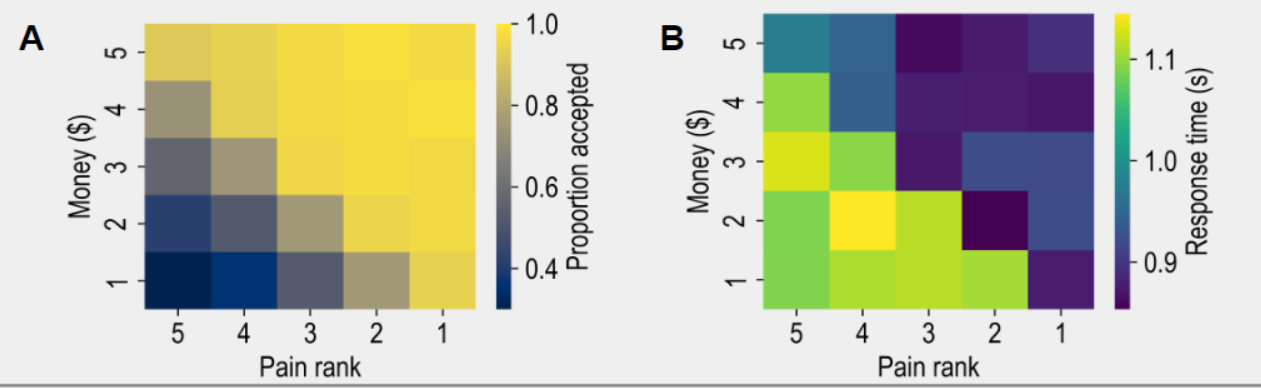

## Analyis for 50 participants (no data for participant 3)

In [5]:
# Logistic Model for heatmap data

# Steps to do first:
# 1. recode 'moneystim' and 'painstim' into integer values
# 2. drop Nans
# 3. subset the data

# rename the dataframe we are using: 
preprocessed_data = combined_data 

# columns of interest:
# combined_data['accepted'] -> choice: 1 = accepted, 0 = rejected


## 2) Creating 'moneylevel': Recode 'moneystim' to integer values , we already have 'painlevel' as integer


In [6]:
# convert moneystim to moneylevel
def convert_moneylevel(moneystim):
    if isinstance(moneystim, str) and moneystim.startswith('m'):
        return int(moneystim[1:])
    return None

preprocessed_data['moneylevel'] = preprocessed_data['moneystim'].apply(convert_moneylevel)
preprocessed_data.to_csv('subs_concatenated_001_050_2.csv', sep=';', index=False)
preprocessed_data

,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,acceptkey,...,trials.thisN,TaskName,P1,P2,P3,P4,P5,fail_ma,fixduration,moneylevel
0,sub-001,p1,m4,,1.0,11500.0,stimuli/m4.png,stimuli/p1.png,right,m,...,0.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.5,4.0
1,sub-001,p5,m5,,5.0,27000.0,stimuli/p5.png,stimuli/m5.png,right,m,...,1.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.6,5.0
2,sub-001,p2,m2,,2.0,14000.0,stimuli/m2.png,stimuli/p2.png,right,m,...,2.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,2.0,2.0
3,sub-001,p4,m4,,4.0,20000.0,stimuli/p4.png,stimuli/m4.png,right,m,...,3.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,4.0
4,sub-001,p2,m3,,2.0,14000.0,stimuli/m3.png,stimuli/p2.png,right,m,...,4.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,sub-050,p3,m3,,3.0,11000.0,stimuli/m3.png,stimuli/p3.png,right,m,...,21.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.5,3.0
6171,sub-050,p3,m1,,3.0,11000.0,stimuli/m1.png,stimuli/p3.png,right,m,...,22.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7,1.0
6172,sub-050,p4,m1,,4.0,14500.0,stimuli/p4.png,stimuli/m1.png,right,m,...,23.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.9,1.0
6173,sub-050,p2,m2,,2.0,8500.0,stimuli/p2.png,stimuli/m2.png,right,m,...,24.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7,2.0


## 3) Preprocessing the data: Dropping NANs from columns:'moneylevel', 'painlevel', 'accepted'


In [7]:
#handling missing data:
preprocessed_data = preprocessed_data.dropna(subset=['moneylevel', 'painlevel', 'accepted'])
preprocessed_data

,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,acceptkey,...,trials.thisN,TaskName,P1,P2,P3,P4,P5,fail_ma,fixduration,moneylevel
0,sub-001,p1,m4,,1.0,11500.0,stimuli/m4.png,stimuli/p1.png,right,m,...,0.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.5,4.0
1,sub-001,p5,m5,,5.0,27000.0,stimuli/p5.png,stimuli/m5.png,right,m,...,1.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.6,5.0
2,sub-001,p2,m2,,2.0,14000.0,stimuli/m2.png,stimuli/p2.png,right,m,...,2.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,2.0,2.0
3,sub-001,p4,m4,,4.0,20000.0,stimuli/p4.png,stimuli/m4.png,right,m,...,3.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,4.0
4,sub-001,p2,m3,,2.0,14000.0,stimuli/m3.png,stimuli/p2.png,right,m,...,4.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,sub-050,p2,m5,,2.0,8500.0,stimuli/m5.png,stimuli/p2.png,right,m,...,20.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,2.0,5.0
6170,sub-050,p3,m3,,3.0,11000.0,stimuli/m3.png,stimuli/p3.png,right,m,...,21.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.5,3.0
6171,sub-050,p3,m1,,3.0,11000.0,stimuli/m1.png,stimuli/p3.png,right,m,...,22.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7,1.0
6172,sub-050,p4,m1,,4.0,14500.0,stimuli/p4.png,stimuli/m1.png,right,m,...,23.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.9,1.0


In [8]:
print(preprocessed_data[['moneylevel', 'painlevel', 'accepted']].dtypes)


moneylevel    float64
painlevel      object
accepted       object
dtype: object


## 4) Preprocessing the data: changing 'object' to 'float64' datatype to fit the model

In [9]:
preprocessed_data['moneylevel'] = pd.to_numeric(preprocessed_data['moneylevel'], errors='coerce')
preprocessed_data['painlevel'] = pd.to_numeric(preprocessed_data['painlevel'], errors='coerce')
preprocessed_data['accepted'] = pd.to_numeric(preprocessed_data['accepted'], errors='coerce')
preprocessed_data['choice_resp.rt'] = pd.to_numeric(preprocessed_data['choice_resp.rt'], errors='coerce')

print(preprocessed_data[['moneylevel', 'painlevel', 'accepted', 'choice_resp.rt']].dtypes)

preprocessed_data

moneylevel        float64
painlevel         float64
accepted          float64
choice_resp.rt    float64
dtype: object


c:\Users\Asus\anaconda3\envs\hddmJune24\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Asus\anaconda3\envs\hddmJune24\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Asus\anaconda3\envs\hddmJune24\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,acceptkey,...,trials.thisN,TaskName,P1,P2,P3,P4,P5,fail_ma,fixduration,moneylevel
0,sub-001,p1,m4,,1.0,11500.0,stimuli/m4.png,stimuli/p1.png,right,m,...,0.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.5,4.0
1,sub-001,p5,m5,,5.0,27000.0,stimuli/p5.png,stimuli/m5.png,right,m,...,1.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.6,5.0
2,sub-001,p2,m2,,2.0,14000.0,stimuli/m2.png,stimuli/p2.png,right,m,...,2.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,2.0,2.0
3,sub-001,p4,m4,,4.0,20000.0,stimuli/p4.png,stimuli/m4.png,right,m,...,3.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,4.0
4,sub-001,p2,m3,,2.0,14000.0,stimuli/m3.png,stimuli/p2.png,right,m,...,4.0,decision,115.0,140.0,165.0,200.0,270.0,300.0,1.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,sub-050,p2,m5,,2.0,8500.0,stimuli/m5.png,stimuli/p2.png,right,m,...,20.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,2.0,5.0
6170,sub-050,p3,m3,,3.0,11000.0,stimuli/m3.png,stimuli/p3.png,right,m,...,21.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.5,3.0
6171,sub-050,p3,m1,,3.0,11000.0,stimuli/m1.png,stimuli/p3.png,right,m,...,22.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7,1.0
6172,sub-050,p4,m1,,4.0,14500.0,stimuli/p4.png,stimuli/m1.png,right,m,...,23.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.9,1.0


## 5) Heatmap: Moneylevel and Painlevel on RT

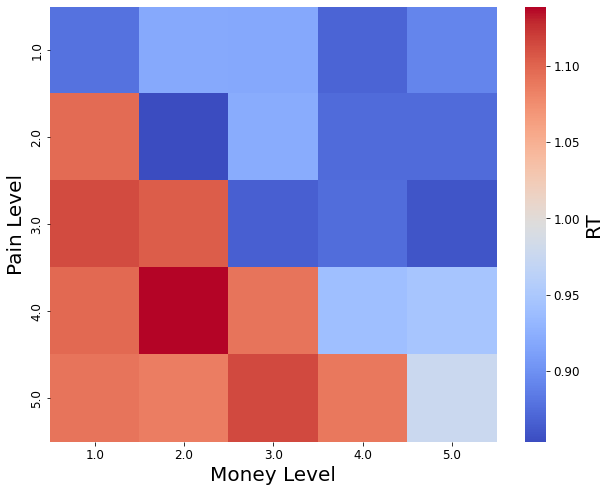

In [10]:
agg_data = preprocessed_data.groupby(['moneylevel', 'painlevel'])['choice_resp.rt'].mean().reset_index()

heatmap_data = agg_data.pivot('painlevel', 'moneylevel', 'choice_resp.rt')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, cbar_kws={'label': 'RT'})
plt.xlabel('Money Level', fontsize=20)
plt.ylabel('Pain Level', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('RT', fontsize=20)
plt.show()

## 6) Heatmap: Moneylevel and Painlevel on Acceptance

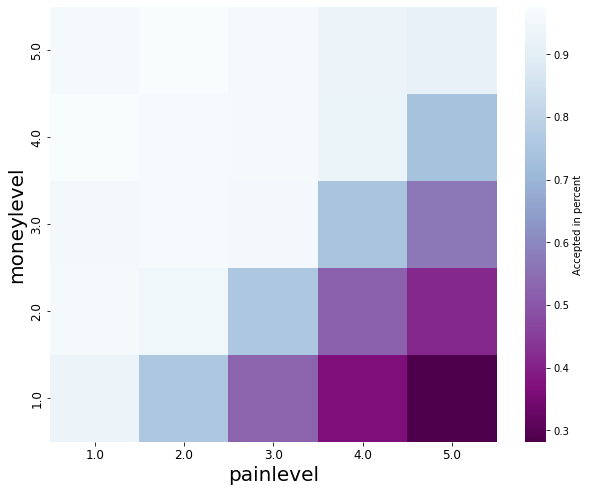

In [13]:
agg_data = preprocessed_data.groupby(['moneylevel', 'painlevel'])['accepted'].mean().reset_index()

heatmap_data = agg_data.pivot_table(values='accepted', index='moneylevel', columns='painlevel', aggfunc='mean')

heatmap_data = heatmap_data.sort_index(ascending=True)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='BuPu_r', cbar_kws={'label': 'Accepted in percent'})
plt.xlabel('painlevel', fontsize=20)
plt.ylabel('moneylevel', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(np.arange(len(heatmap_data.index)) + 0.5, heatmap_data.index)
plt.gca().invert_yaxis() 

plt.show()



### get unique participants

In [23]:
participant_ids = ['sub-001', 'sub-002', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 
                   'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020',
                   'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-029', 'sub-030',
                   'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040',
                   'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050']


## 7) Setting rejection threshold to .99: Dropping participants who only ever choose money on 99% of the trials

In [30]:
def drop_participants(preprocessed_data, participant_ids, threshold=125.0 * 0.99):
    participants_to_include = []
    for participant in participant_ids:
        participant_data = preprocessed_data[preprocessed_data['participant'] == participant]
        accept_sum = participant_data['accepted'].sum() 
        if accept_sum < threshold:
            participants_to_include.append(participant)
    return participants_to_include

included_participants = drop_participants(preprocessed_data, participant_ids)
preprocessed_data = preprocessed_data[preprocessed_data['participant'].isin(included_participants)]
preprocessed_data.to_csv('subs_concatenated_001_050_3.csv', sep=';', index=False)

preprocessed_data


,participant,painstim,moneystim,all_trials_rewards,painlevel,painlevel_J,leftstim,rightstim,acceptside,acceptkey,...,trials.thisN,TaskName,P1,P2,P3,P4,P5,fail_ma,fixduration,moneylevel
126,sub-002,p2,m2,,2.0,30500.0,stimuli/p2.png,stimuli/m2.png,right,m,...,0.0,decision,205.0,305.0,415.0,530.0,660.0,700.0,1.5,2.0
127,sub-002,p1,m2,,1.0,20500.0,stimuli/m2.png,stimuli/p1.png,right,m,...,1.0,decision,205.0,305.0,415.0,530.0,660.0,700.0,1.8,2.0
128,sub-002,p3,m2,,3.0,41500.0,stimuli/p3.png,stimuli/m2.png,right,m,...,2.0,decision,205.0,305.0,415.0,530.0,660.0,700.0,1.5,2.0
129,sub-002,p4,m4,,4.0,53000.0,stimuli/p4.png,stimuli/m4.png,right,m,...,3.0,decision,205.0,305.0,415.0,530.0,660.0,700.0,1.9,4.0
130,sub-002,p4,m2,,4.0,53000.0,stimuli/p4.png,stimuli/m2.png,right,m,...,4.0,decision,205.0,305.0,415.0,530.0,660.0,700.0,1.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,sub-050,p2,m5,,2.0,8500.0,stimuli/m5.png,stimuli/p2.png,right,m,...,20.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,2.0,5.0
6170,sub-050,p3,m3,,3.0,11000.0,stimuli/m3.png,stimuli/p3.png,right,m,...,21.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.5,3.0
6171,sub-050,p3,m1,,3.0,11000.0,stimuli/m1.png,stimuli/p3.png,right,m,...,22.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.7,1.0
6172,sub-050,p4,m1,,4.0,14500.0,stimuli/p4.png,stimuli/m1.png,right,m,...,23.0,decision,65.0,85.0,110.0,145.0,200.0,700.0,1.9,1.0
